In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv dataset into dataframe
df = pd.read_csv('US_Accidents_Dec21_updated_1.csv')

In [3]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(1048575, 47)
(370853, 47)


In [4]:
# Drop ID column
df.drop(columns = ['ID'], inplace = True)
df.drop(columns = ['Description'], inplace = True)

In [5]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

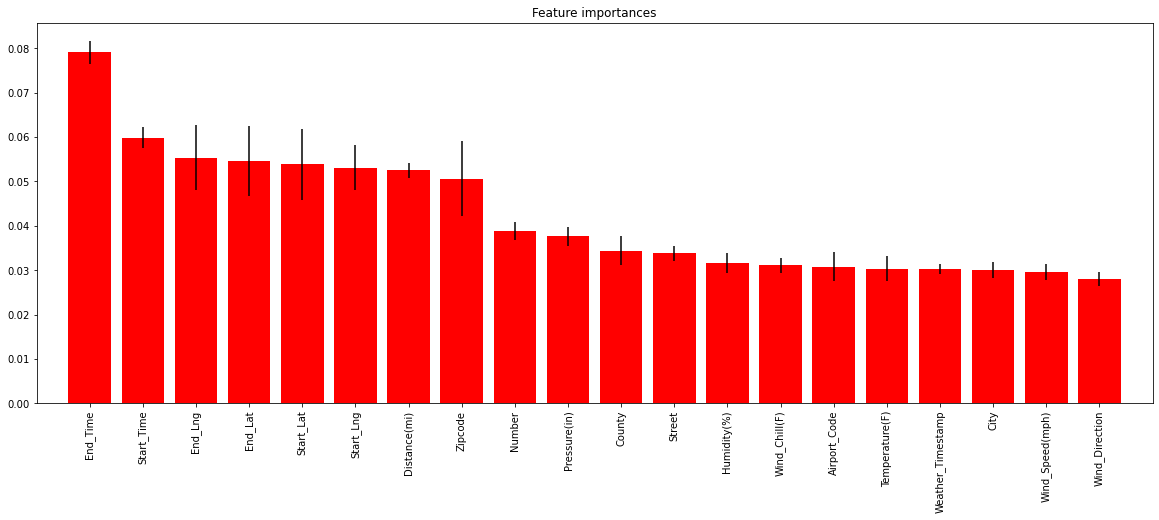

In [7]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)

importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [8]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [9]:
y.unique()

array([4, 2, 3])

In [10]:
y = y-1

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [14]:
X_train.shape

(296682, 44)

In [15]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

2022-12-11 22:55:02.234551: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-11 22:55:02.234622: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-167-149.ec2.internal): /proc/driver/nvidia/version does not exist
2022-12-11 22:55:02.235170: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 22:55:03.018610: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 41772720 exceeds 10% of free system memory.


Epoch 1/30
5934/5934 [==============================] - 15s 2ms/step - loss: 0.0951 - accuracy: 0.9776 - val_loss: 0.0907 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 2/30
5934/5934 [==============================] - 10s 2ms/step - loss: 0.0863 - accuracy: 0.9780 - val_loss: 0.0875 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 3/30
5934/5934 [==============================] - 10s 2ms/step - loss: 0.0831 - accuracy: 0.9782 - val_loss: 0.0853 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 4/30
5934/5934 [==============================] - 14s 2ms/step - loss: 0.0813 - accuracy: 0.9784 - val_loss: 0.0844 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 5/30
5934/5934 [==============================] - 11s 2ms/step - loss: 0.0797 - accuracy: 0.9783 - val_loss: 0.0842 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 6/30
5934/5934 [==============================] - 10s 2ms/step - loss: 0.0788 - accuracy: 0.9783 - val_loss: 0.0842 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 7/30
5934/5934 [==============================

In [17]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.9784821271896362


In [18]:
losses=pd.DataFrame(history.history)

In [19]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.095104,0.977590,0.090727,0.977316,0.001
1,0.086331,0.977965,0.087462,0.977636,0.001
2,0.083109,0.978217,0.085268,0.977704,0.001
3,0.081265,0.978352,0.084419,0.977771,0.001
4,0.079702,0.978331,0.084170,0.977720,0.001


In [20]:
l = pd.DataFrame({'loss':losses['loss'], 'validation_loss':losses['val_loss']})

<AxesSubplot:>

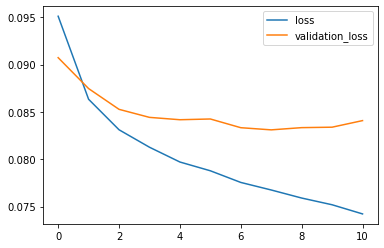

In [21]:
l.plot()